In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#------------------
# Data Preparation
#------------------

In [3]:
#Read datasets
#Download the data from http://www.saedsayad.com/datasets/CreditData.zip
train <- read.csv("Credit_train.csv")
test <- read.csv("Credit_test.csv")

In [6]:
#Show  
head(train)
head(test)

,BUSAGE,BUSTYPE,MAXLINEUTIL,DAYSDELQ,TOTACBAL,DEFAULT
,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,183,B,0,0,0.24,N
2,271,E,0,0,1.37,N
3,51,A,0,0,1.52,N
4,208,A,0,0,1.64,N
5,148,A,0,0,1.78,N
6,82,D,0,0,1.88,N


,BUSAGE,BUSTYPE,MAXLINEUTIL,DAYSDELQ,TOTACBAL,DEFAULT
,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,354,A,3.0425,0,152125.6,N
2,99,A,0.0000,0,151060.9,N
3,100,A,2.4507,0,122538.6,N
4,85,C,1.1397,0,113975.4,N
5,82,A,1.1241,0,112415.7,N
6,62,A,0.0000,0,106760.2,Y


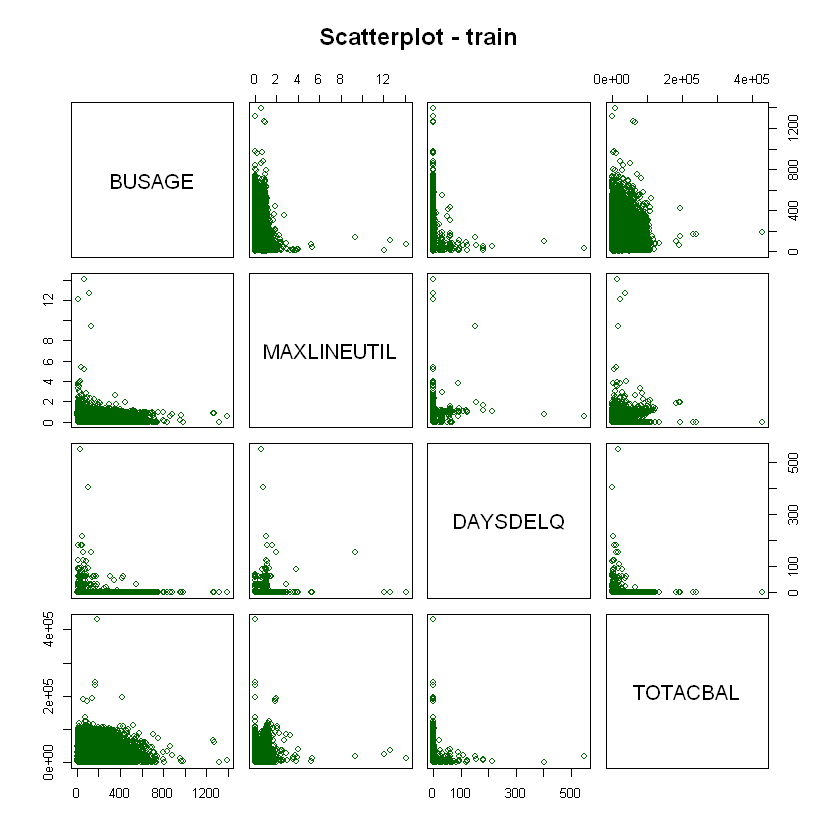

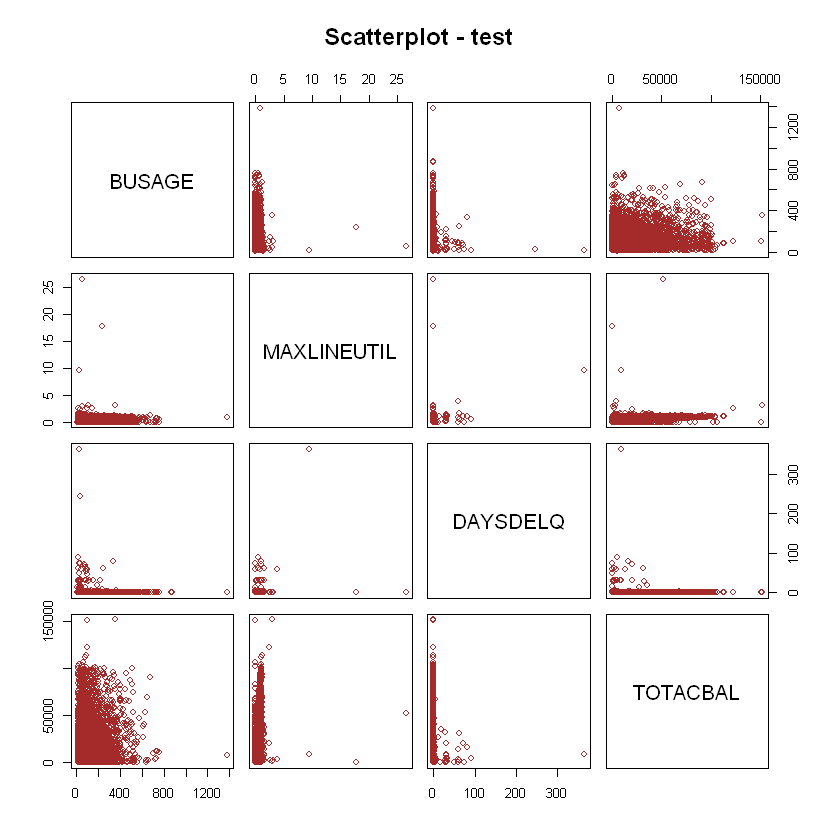

In [8]:
#-----------------------------------------------------------------
# Data Exploration - Bivariate analysis - Numerical and Numerical
#-----------------------------------------------------------------

#BUSAGE, MAXLINEUTIL, DAYSDELQ, TOTACBA
pairs(~BUSAGE+MAXLINEUTIL+DAYSDELQ+TOTACBAL, data=train, main="Scatterplot - train", col="darkgreen")

pairs(~BUSAGE+MAXLINEUTIL+DAYSDELQ+TOTACBAL, data=test, main="Scatterplot - test", col="brown")

In [9]:
#Correlation
train <- na.omit(train)
cor(train$DAYSDELQ,train$MAXLINEUTIL)

#Covariance and Variance
train <- na.omit(train)
cov(train$DAYSDELQ,train$MAXLINEUTIL)
var(train$DAYSDELQ,train$DAYSDELQ)

#Correlation and Covariance matrix
d <- train
d$DEFAULT <- NULL
d$BUSTYPE <- NULL
cor(d)
cov(d)

[1] 0.06630208

[1] 0.2041047

[1] 50.82906

,BUSAGE,MAXLINEUTIL,DAYSDELQ,TOTACBAL
BUSAGE,1.00000000,-0.04065150,-0.02358832,0.07412353
MAXLINEUTIL,-0.04065150,1.00000000,0.06630208,0.51731645
DAYSDELQ,-0.02358832,0.06630208,1.00000000,-0.03610716
TOTACBAL,0.07412353,0.51731645,-0.03610716,1.00000000


,BUSAGE,MAXLINEUTIL,DAYSDELQ,TOTACBAL
BUSAGE,10845.188336,-1.8279521,-17.5134428,175052.573
MAXLINEUTIL,-1.827952,0.1864401,0.2041047,5065.471
DAYSDELQ,-17.513443,0.2041047,50.8290635,-5837.719
TOTACBAL,175052.572956,5065.4711615,-5837.7194393,514265898.198


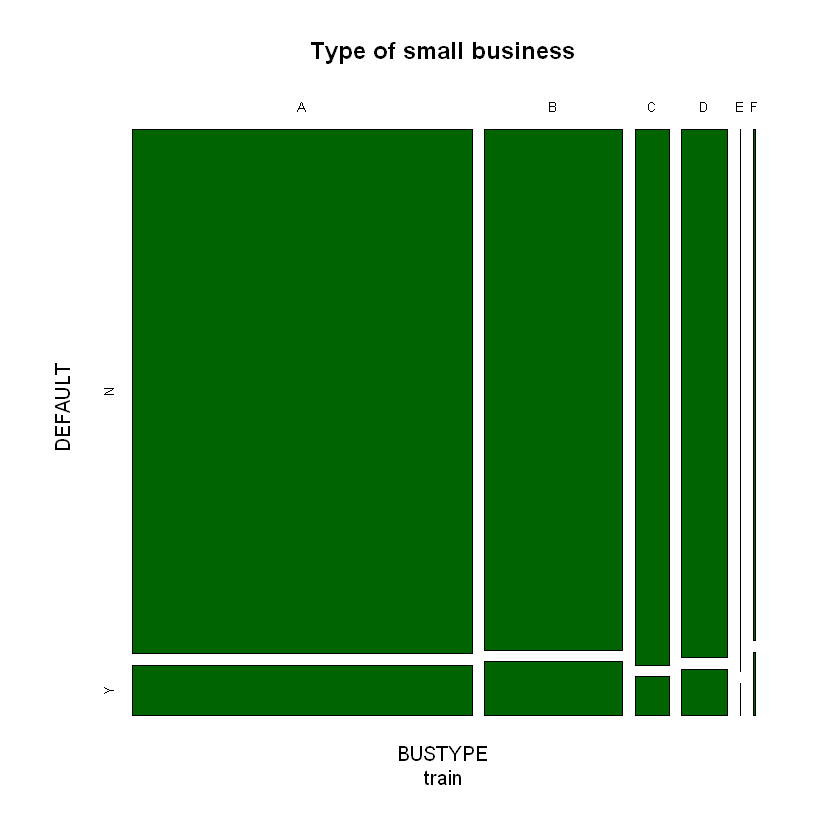

Warning message in chisq.test(tbl):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tbl
X-squared = 9.8548, df = 5, p-value = 0.07946


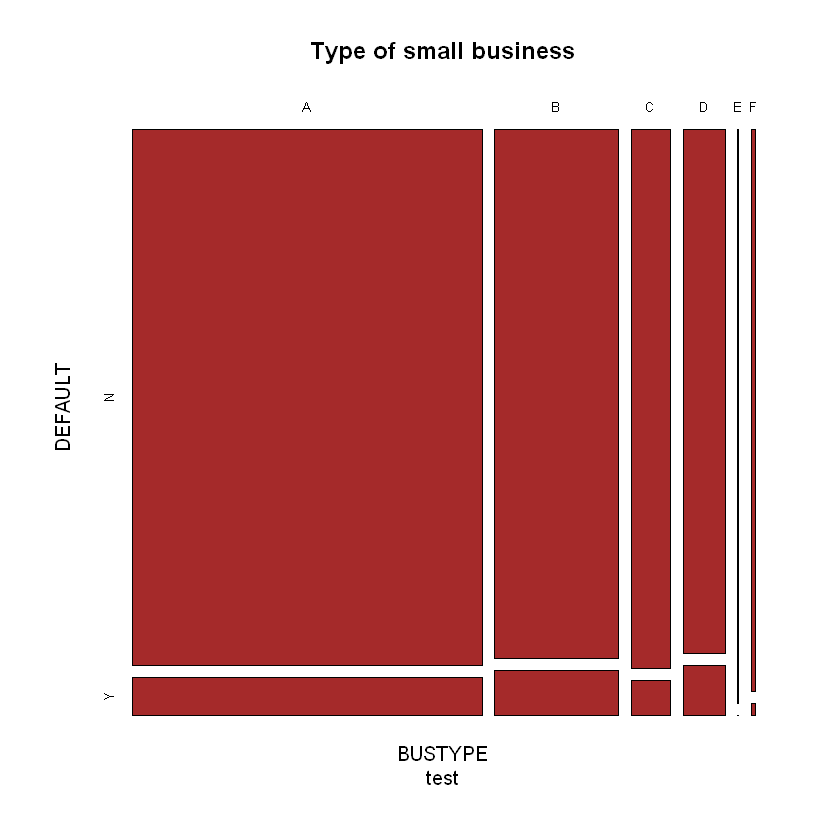

In [10]:
#---------------------------------------------------------------------
# Data Exploration - Bivariate analysis - Categorical and Categorical
#---------------------------------------------------------------------

#DEFAULT and BUSTYPE
x <- xtabs(~BUSTYPE+DEFAULT, data=train)
plot(x, main="Type of small business", sub="train", col="darkgreen")

y <- xtabs(~BUSTYPE+DEFAULT, data=test)
plot(y, main="Type of small business", sub="test", col="brown")


#Chi Squared test
tbl <- table(train$DEFAULT, train$BUSTYPE)
chisq.test(tbl)

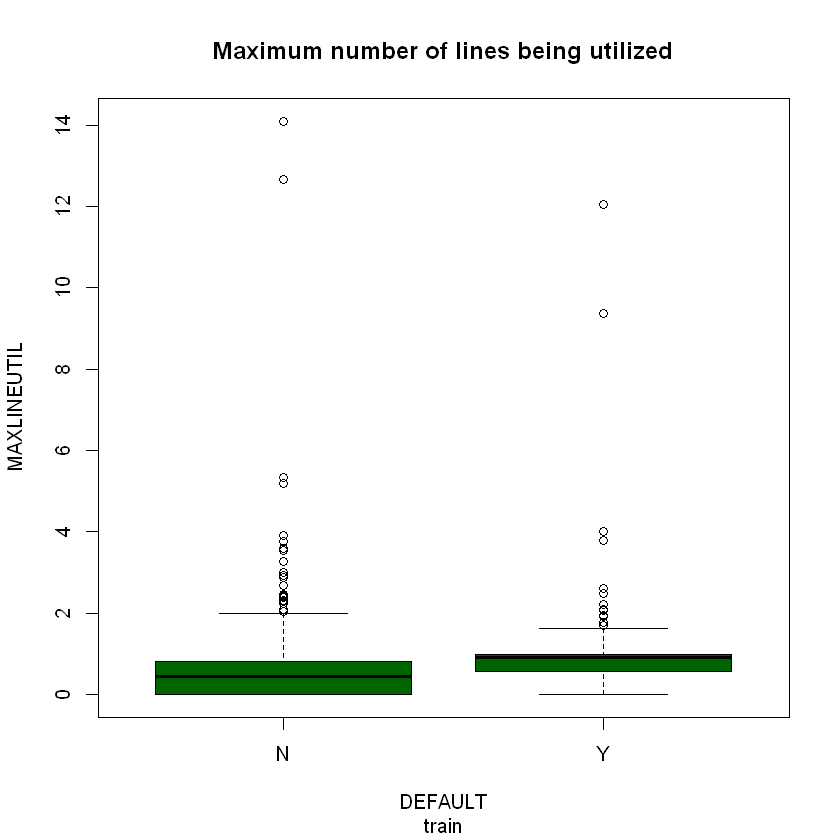

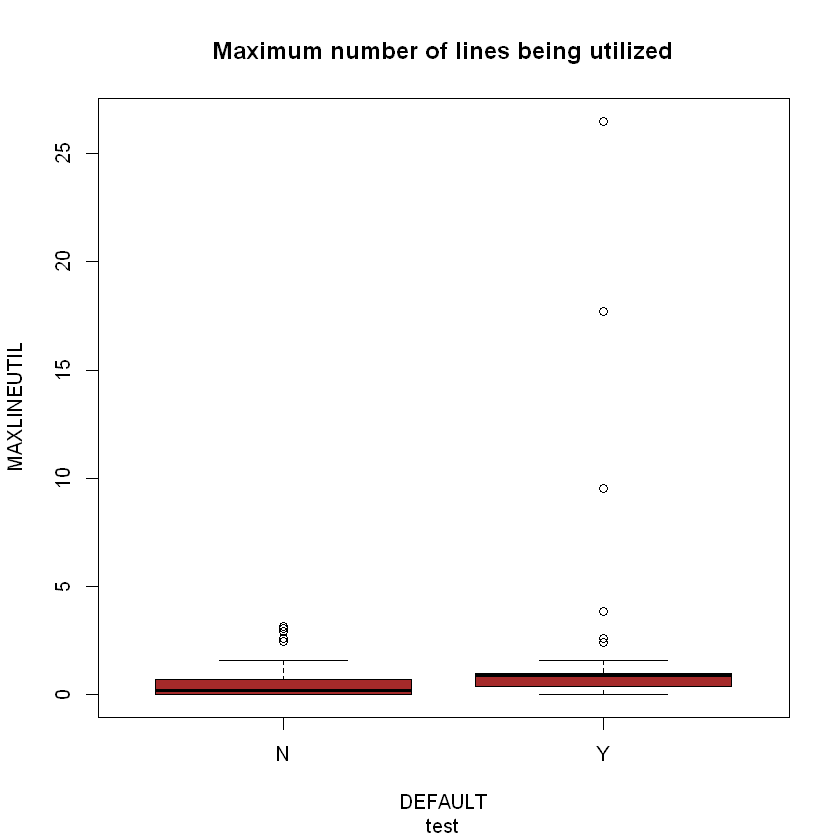

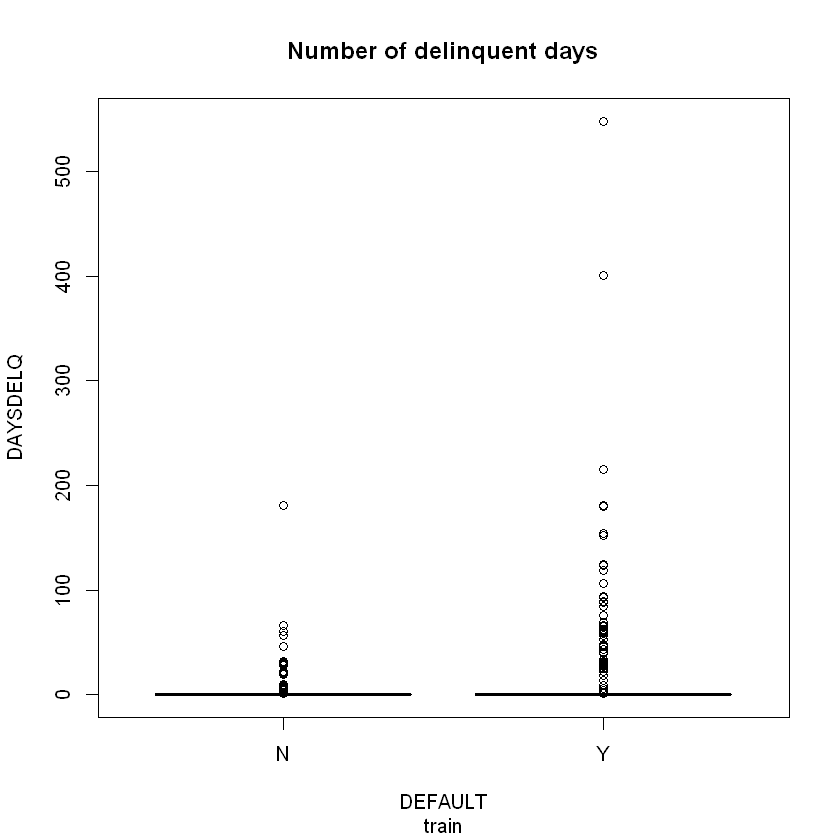

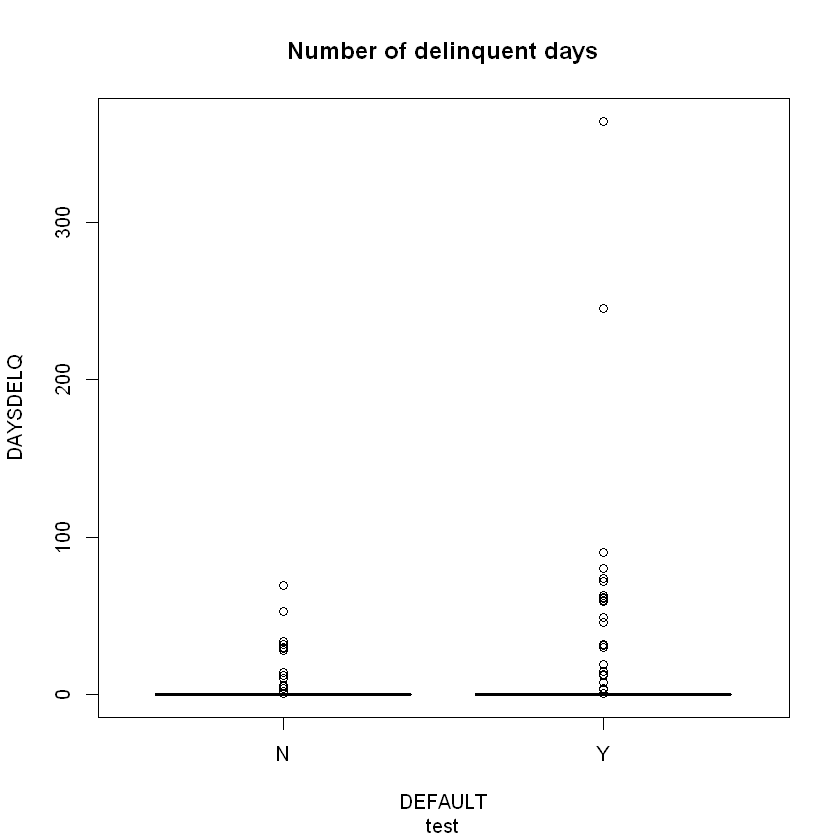

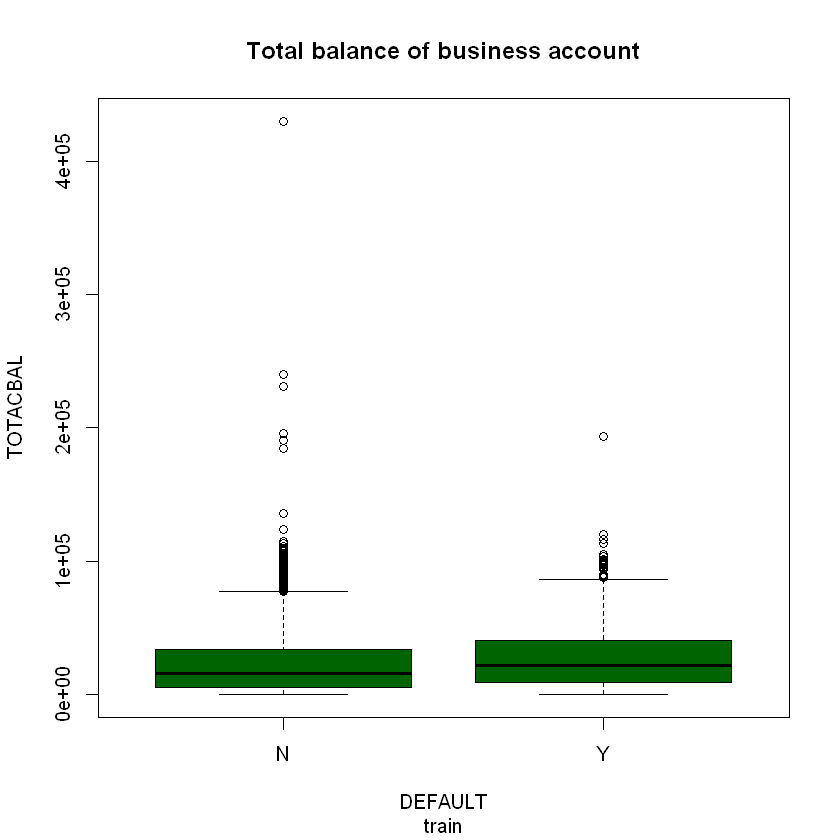

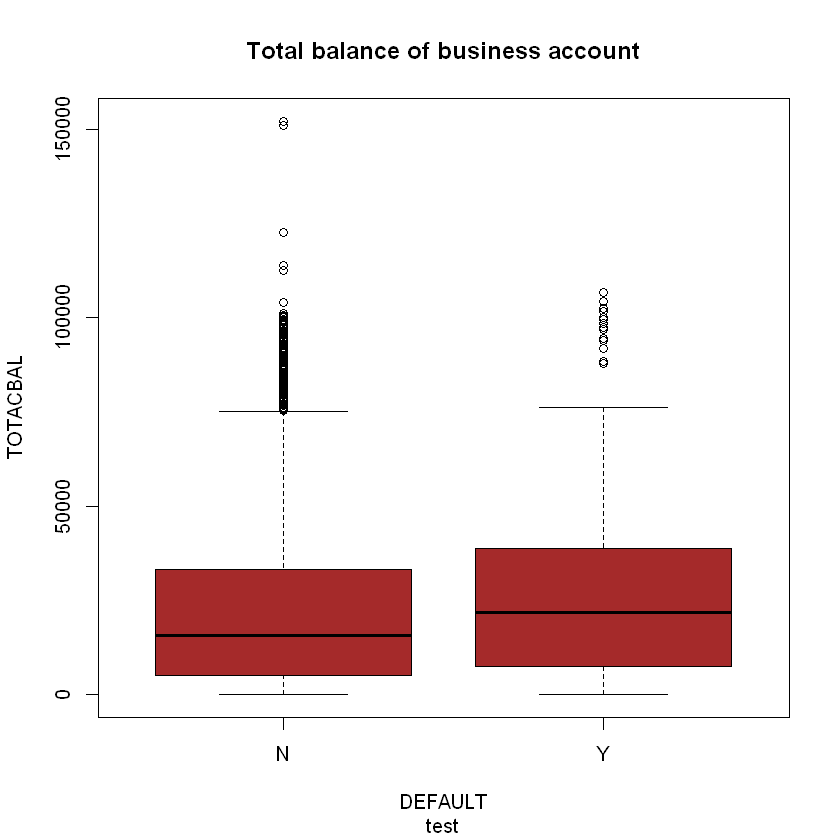

In [14]:
#-------------------------------------------------------------------
# Data Exploration - Bivariate analysis - Categorical and Numerical
#-------------------------------------------------------------------

#DEFAULT and MAXLINEUTIL
boxplot(MAXLINEUTIL~DEFAULT, data=train, main="Maximum number of lines being utilized" 
        , sub="train", col="darkgreen", xlab="DEFAULT", ylab="MAXLINEUTIL")
boxplot(MAXLINEUTIL~DEFAULT, data=test, main="Maximum number of lines being utilized" 
        , sub="test", col="brown", xlab="DEFAULT", ylab="MAXLINEUTIL")

#DEFAULT and DAYSDELQ
boxplot(DAYSDELQ~DEFAULT, data=train, main="Number of delinquent days" 
        , sub="train", col="darkgreen", xlab="DEFAULT", ylab="DAYSDELQ")
boxplot(DAYSDELQ~DEFAULT, data=test, main="Number of delinquent days" 
        , sub="test", col="brown", xlab="DEFAULT", ylab="DAYSDELQ")

#DEFAULT and TOTACBAL
boxplot(TOTACBAL~DEFAULT, data=train, main="Total balance of business account" 
        , sub="train", col="darkgreen", xlab="DEFAULT", ylab="TOTACBAL")
boxplot(TOTACBAL~DEFAULT, data=test, main="Total balance of business account" 
        , sub="test", col="brown", xlab="DEFAULT", ylab="TOTACBAL")

In [17]:
#Z-test for two variables - DEFAULT and DAYSDELQ
train <- na.omit(train)
a <- subset(train$DAYSDELQ,train$DEFAULT=='Y')
b <- subset(train$DAYSDELQ,train$DEFAULT=='N')
n1 <- length(a)
n2 <- length(b)
z <- (mean(a) - mean(b)) / (sqrt(var(a)/n1 + var(b)/n2))
pz <- 1-(pnorm(abs(z))-0.5)*2
print(z)
print(pz)

[1] 6.445539
[1] 1.151905e-10


In [18]:
#Z-test for two variables - TOTACBAL and DEFAULT
train <- na.omit(train)
a <- subset(train$TOTACBAL,train$DEFAULT=='Y')
b <- subset(train$TOTACBAL,train$DEFAULT=='N')
n1 <- length(a)
n2 <- length(b)
z <- (mean(a) - mean(b)) / (sqrt(var(a)/n1 + var(b)/n2))
pz <- 1-(pnorm(abs(z))-0.5)*2
print(z)
print(pz)

[1] 8.065861
[1] 6.661338e-16


In [20]:
#Z-test for two variables - BUSAGE and DEFAULT
train <- na.omit(train)
a <- subset(train$BUSAGE,train$DEFAULT=='Y')
b <- subset(train$BUSAGE,train$DEFAULT=='N')
n1 <- length(a)
n2 <- length(b)
z <- (mean(a) - mean(b)) / (sqrt(var(a)/n1 + var(b)/n2))
pz <- 1-(pnorm(abs(z))-0.5)*2
print(z)
print(pz)

[1] -13.9461
[1] 0


In [21]:
#Z-test for two variables - MAXLINEUTIL and DEFAULT
train <- na.omit(train)
a <- subset(train$MAXLINEUTIL,train$DEFAULT=='Y')
b <- subset(train$MAXLINEUTIL,train$DEFAULT=='N')
n1 <- length(a)
n2 <- length(b)
z <- (mean(a) - mean(b)) / (sqrt(var(a)/n1 + var(b)/n2))
pz <- 1-(pnorm(abs(z))-0.5)*2
print(z)
print(pz)

[1] 24.82391
[1] 0


In [26]:
#ANOVA - BUSAGE and BUSTYPE 
fit <- aov(train$BUSAGE ~ train$BUSTYPE)
summary(fit)

#ANOVA - BUSTYPE and TOTACBAL 
fit <- aov(train$TOTACBAL ~ train$BUSTYPE)
summary(fit)

#ANOVA - MAXLINEUTIL and BUSTYPE 
fit <- aov(train$MAXLINEUTIL ~ train$BUSTYPE)
summary(fit)

#ANOVA - DAYSDELQ and BUSTYPE 
fit <- aov(train$DAYSDELQ ~ train$BUSTYPE)
summary(fit)

                 Df    Sum Sq Mean Sq F value Pr(>F)    
train$BUSTYPE     5   2168155  433631    40.4 <2e-16 ***
Residuals     19003 203977185   10734                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                 Df    Sum Sq   Mean Sq F value   Pr(>F)    
train$BUSTYPE     5 4.196e+10 8.393e+09   16.39 3.59e-16 ***
Residuals     19003 9.733e+12 5.122e+08                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                 Df Sum Sq Mean Sq F value   Pr(>F)    
train$BUSTYPE     5      7  1.4220    7.64 3.49e-07 ***
Residuals     19003   3537  0.1861                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                 Df Sum Sq Mean Sq F value Pr(>F)
train$BUSTYPE     5     98   19.65   0.387  0.858
Residuals     19003 966061   50.84               